In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

from googletrans import Translator
import googletrans
import pandas as pd
import time

translator = Translator(service_urls=['translate.google.com'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df = pd.read_csv("train (1).csv")

In [33]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
df.shape

(5574, 2)

F:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

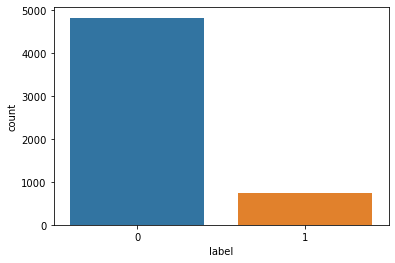

In [35]:
sns.countplot('label',data=df)

In [36]:
len(df[df['label'] == 0])

4827

In [37]:
len(df[df['label'] == 1])

747

In [38]:
# Count the number of instances in each class
class_counts = df['label'].value_counts()

# Identify the minority class label
minority_class_label = class_counts.index[-1]

# Split the dataset into minority and majority classes
minority_class = df[df['label'] == minority_class_label]
majority_class = df[df['label'] != minority_class_label]

# Perform random under-sampling on the majority class
n_samples = len(minority_class)
majority_class_undersampled = resample(majority_class, n_samples=n_samples, replace=False, random_state=42)

# Combine the minority and majority classes back into a single DataFrame
df_undersampled = pd.concat([minority_class, majority_class_undersampled])

# Shuffle the rows of the new DataFrame
df = df_undersampled.sample(frac=1, random_state=42)

In [39]:
df.shape

(1494, 2)

F:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

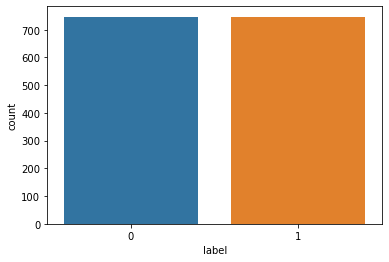

In [40]:
sns.countplot('label',data=df)

In [41]:
df.iloc[100]['sms']

'Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832\n'

In [42]:
df.iloc[100]['label']

1

In [43]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [44]:
#df['sms'] = df['sms'].apply(clean_text)

In [45]:
df.iloc[100]['sms']

'Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832\n'

In [46]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Stem text
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

# Apply the clean_text function to all text columns in the dataframe
#df['sms'] = df['sms'].apply(clean_text)

In [47]:
df.iloc[100]['sms']

'Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832\n'

In [48]:
df.shape

(1494, 2)

In [49]:
df['sms'] = df['sms'].astype(str)

In [20]:
df_translated = df.iloc[:200, :].copy()

In [21]:
df_translated.shape

(200, 2)

In [231]:
# Read the dataframe from a CSV file
# Define a function to translate text using the Google Translate API
def translate_text(text, dest='ar'):
    translation = translator.translate(text,src= 'en' ,dest=dest)
    time.sleep(0.1)
    return translation.text

# Apply the translation function to all text columns in the dataframe
#df_translated['sms'] = df_translated['sms'].apply(translate_text)

# Write the translated dataframe to a CSV file
#df.to_csv('translated_sms.csv', index=False)

In [23]:
df_translated.head(50)

,sms,label
3415,ممنوع التصوير. يرجى إعادة إرسال.,0
4228,شراء بيضة واحدة لي da..please :),0
2963,"""لا شيء! NORE IKNO DOSISCOUNT! SHITINNIT""",0
2151,احتلت الطاولة ، أنا في انتظار الشجرة,0
3827,صباح الخير ، انتهت صلاحية جدي .. لذلك في إجازة...,0
4156,هل تريد هاتف فيديو جديد؟750 في أي وقت أي شبكة ...,1
3587,أنا ساخن n قرنية ومستعدة أنا أعيش محليًا لك - ...,1
2170,تسوق Till U Drop ، هل أنت ، إما 10K ، 5K ، 500...,1
2480,ارتعش من الغوغاء مع مجموعة هالوين من رسالة شعا...,1
1718,رائع!الأولاد ص.خذ جولة 2007 المملكة المتحدة.ار...,1


In [50]:
df_translated.iloc[100]['sms']

'شكرا لك ، الفائز الذي تم إخطاره من قبل الرسائل القصيرة.حظ سعيد!لا يوجد رد تسويقي مستقبلي توقف إلى 84122 خدمات العملاء 08450542832'

In [51]:
df_translated.iloc[101]['sms']

'عاجل!يرجى الاتصال على 09061213237 من خط أرضي.5000 جنيه إسترليني نقد أو 4* عطلة في انتظار جمع.T&CS SAE PO BOX 177 M227XY.16+'

In [53]:
for i in range(len(df_translated)):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\4250893930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i]


In [54]:
df.iloc[190:210,:]

,sms,label
4349,أنت تعيدنا إلى إثبات الهوية الخاص بي و & lt ؛#...,0
3634,هوى شين في دا ليب.,0
4703,في أي وقت ...,0
2659,ليس بعد chikku .. wat abt u؟,0
1073,عزيزي لقد تمت دعوتك إلى Xchat.هذه هي محاولتنا ...,1
2729,عاجل يرجى الاتصال على 09066612661 من الخط الأر...,1
1875,هل ترغب في رؤية صور XXX الخاصة بي ، فهي ساخنة ...,1
2079,85233 مجاني> نغمة! رد حقيقي,1
4822,أنا بخير!لقد كنت أفكر فيك ...,0
792,كل e أفضل 4 ur driving tmr :-),0


In [62]:
df_translated = df.iloc[200:400, :].copy()
df_translated['sms'] = df_translated['sms'].astype(str)

In [63]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [64]:
df_translated.iloc[100]['sms']

'هذه هي المرة الثانية التي حاولنا فيها الاتصال بك.لقد فازت بجائزة 400 جنيه إسترليني.2 المطالبة سهلة ، فقط اتصل على 087104711148 الآن!10p فقط في الدقيقة.معدل BT-National'

In [65]:
df.iloc[300]['sms']

'This is the 2nd time we have tried to contact u. U have won the £400 prize. 2 claim is easy, just call 087104711148 NOW! Only 10p per minute. BT-national-rate\n'

In [66]:
df_translated.head(50)

,sms,label
705,صحيح عزيزي .. جلست للصلاة في المساء وشعرت بذلك.,0
4450,منحت Urgent Uur رحلة مجانية إلى Eurodisinc Tra...,1
2209,عاجل!!عطلة 4* كوستا ديل سول أو 5000 جنيه إسترل...,1
768,آسف سأتصل في وقت لاحق,0
2248,مرة أخرى 2 العمل 2morro نصف مصطلح!هل يمكنك C M...,1
1307,استمتع بمقاطع فيديو Jamster Gold Club مع ائتما...,1
4967,عاجل!نحن نحاول الاتصال بعروض السحب اليوم U.اتص...,1
4249,وفقاً لذلك.أكرر ، فقط أرسل رسالة نصية على هاتف...,1
3831,أنا موافق.حتى أتمكن من التوقف عن التفكير في iP...,0
424,عاجل!تم منح رقم هاتفك المحمول بجائزة 2000 جنيه...,1


In [70]:
df_translated.iloc[199]['sms']

'شكرًا على طلب نغمة الرنين ، رقم المرجع K718.سيتم تحميل هاتفك المحمول 4.50 جنيه إسترليني.إذا لم تصل لهجتك ، يرجى الاتصال بخدمات العملاء على 09065069120'

In [72]:
df.iloc[399]['sms']

'Thanks for your ringtone order, ref number K718. Your mobile will be charged £4.50. Should your tone not arrive please call customer services on 09065069120\n'

In [73]:
backup = df.copy()

In [83]:
for i in range(200,400):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-200]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\3458339559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-200]


In [84]:
df.iloc[390:410,:]

,sms,label
4643,أنت ممزق!احصل على محتوى الهاتف المحمول من www....,1
1714,Hard Live 121 Chat فقط 60p/min.اختر فتاتك واتص...,1
2417,ألا تقرأني يا حبيبتي؟جاوبتك,0
4011,WAN2 اربح لقاء+تحية مع Westlife 4 U أو M8؟هم ح...,1
1468,لن أتطرق إليك دون إذنك.,0
740,هاها ربما أنت على حق ... أنت تعرفني جيدًا.دا ا...,0
4397,عزيزي:-/ لماذا أنت مزاج.لا أستطيع القيادة لذلك...,0
4972,يا تعال على الإنترنت!استخدم MSN ... نحن جميعًا...,0
3713,ماذا تفعل هناك؟,0
2224,شكرًا على طلب نغمة الرنين ، رقم المرجع K718.سي...,1


In [85]:
backup = df.copy()

In [89]:
df.iloc[400]['sms']

'K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can go cine frm 1030 to 2, den hop to orc mrt 4 hip hop at 4...\n'

In [94]:
df_translated = df.iloc[400:500, :].copy()
df_translated['sms'] = df_translated['sms'].astype(str)

In [95]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [97]:
df_translated.iloc[99]['sms']

'يا طفل من المنزل.كيف لا تملك أي صور جديدة على Facebook'

In [100]:
df.iloc[499]['sms']

'Oh baby of the house. How come you dont have any new pictures on facebook\n'

In [102]:
df_translated.iloc[99]['sms']

'يا طفل من المنزل.كيف لا تملك أي صور جديدة على Facebook'

In [103]:
df_translated.head(50)

,sms,label
3462,ك .. أنا يان جيو لياو ... سبت يمكننا أن نذهب 4...,0
2910,عاجل!تم منح رقم هاتفك المحمول بجائزة 2000 جنيه...,1
2705,Freemsg: يتوهم مغازلة؟تاريخ الرد الآن وانضم إل...,1
368,هنا هو رمز الخصم الخاص بك RP176781.لإيقاف المز...,1
4102,GSOH؟جيد مع البريد العشوائي للسيدات؟ هل يمكنك ...,1
3489,ما زلت لم أتحقق من ذلك...,0
2261,Splash Mobile: اختر من 1000 من GR8 نغمات كل أس...,1
589,يا srsly أفضل من يي ثو,0
752,لديك إعلان مهم لخدمة العملاء من Premier.,1
5485,لذلك لي هاي ... أنا أشعر بالملل الآن محاضر دا ...,0


In [105]:
backup = df.copy()

In [107]:
for i in range(400,500):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-400]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\3198085210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-400]


In [108]:
df.iloc[490:510,:]

,sms,label
3826,أهلاً.أنا دائمًا متصل بالإنترنت على Yahoo وأرغ...,0
2185,أنا أعرف بعض الأشخاص الذين يمكنني ضربهم وأمارس...,0
1328,رصيدك هو الآن 500 جنيه إسترليني.سؤالك التالي ه...,1
3909,تبدو كخطة!كارديف لا يزال هنا ولا يزال باردًا!أ...,0
4880,نعم فقط افتح الدردشة وانقر فوق قوائم الأصدقاء....,0
3272,لديك بريد صوتي جديد.يرجى الاتصال على 08719181513.,1
4295,Strip Strip - لقد تم إصدار فاتورة 150 بكسل.Net...,1
1215,سأرسل رسالة نصية الآن!كلها زاحف مثل حتى لا يعت...,0
672,"رسالة قصيرة.AC Sun0819 Posts Hello: ""يبدو أنك ...",1
2700,يا طفل من المنزل.كيف لا تملك أي صور جديدة على ...,0


In [111]:
df.iloc[500]['sms']

"Anyway I don't think I can secure anything up here, lemme know if you want me to drive down south and chill\n"

In [112]:
df_translated = df.iloc[500:600, :].copy()
df_translated['sms'] = df_translated['sms'].astype(str)

In [113]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [114]:
df_translated.iloc[99]['sms']

'نعم ، هذا ما كنت أفكر فيه'

In [115]:
df.iloc[599]['sms']

"yeah, that's what I was thinking\n"

In [117]:
for i in range(500,600):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-500]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\676765256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-500]


In [118]:
df.iloc[590:610,:]

,sms,label
4073,القروض لأي غرض حتى لو كان لديك ائتمان سيئ!مستأ...,1
5542,سأل 3Mobile إذا كان 0870 chatlines inclu في دق...,1
264,مرحبًا ، أنا حقًا قرني أريد الدردشة أو رؤيتي ن...,1
4048,شكرًا على طلب نغمة الرنين ، الرقم المرجعي x49....,1
1699,MSG الحرة.عذرًا ، لا يمكن تسليم الخدمة التي طل...,1
876,تسوق Till U Drop ، هل أنت ، إما 10K ، 5K ، 500...,1
4407,كواحد من المشتركين المسجلين لدينا ، يمكنك إدخا...,1
3554,الدين أقول لك jus الآن 420,0
4968,يمكنك التبرع بمبلغ 2.50 جنيه إسترليني لصندوق د...,1
5312,نعم ، هذا ما كنت أفكر فيه,0


In [120]:
df.iloc[600]['sms']

'You are gorgeous! keep those pix cumming :) thank you!\n'

In [138]:
df_translated = df.iloc[600:700, :].copy()
df_translated['sms'] = df_translated['sms'].astype(str)

In [139]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [140]:
df_translated.iloc[99]['sms']

"ree intring in 2 A Compain Comp for فرصة للفوز بجهاز iPod.TXT POD إلى 80182 للحصول على الدخول (معدل TXT STD) T&C's تطبيق 08452810073 للحصول على التفاصيل 18+"

In [141]:
df.iloc[699]['sms']

"ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+\n"

In [143]:
for i in range(600,700):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-600]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\1659764600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-600]


In [144]:
df.iloc[690:710,:]

,sms,label
3468,عاجل!نحاول الاتصال بـ U. Todays Draw Shows أنك...,1
2142,حسنًا ، أخذ المورفين.مرة أخرى في يو.,0
1441,نسيم بارد ... الشمس الساطعة ... زهرة طازجة ......,0
781,رأيك عني؟1. أكثر من 2. Jada 3. Kusruthi 4. Lov...,0
548,آسف أن هذا استغرق وقتا طويلا ، omw الآن,0
418,الدخول المجاني إلى مسابقةنا الأسبوعية بقيمة 25...,1
2451,ك .. استعد شكري.,0
635,عزيزي حامل القسيمة ، 2 مطالبة بعرض هذا الأسبوع...,1
4949,مرحبًا ، هذا إيمي ، سنرسل لك رقم هاتف مجاني في...,1
5191,ree intring in 2 A Compain Comp for فرصة للفوز...,1


In [147]:
df.iloc[700]['sms']

'Win the newest “Harry Potter and the Order of the Phoenix (Book 5) reply HARRY, answer 5 questions - chance to be the first among readers!\n'

In [161]:
df_translated = df.iloc[700:800, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [162]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [163]:
df_translated.iloc[99]['sms']

'فقط NW جئت إلى HME DA ..'

In [164]:
df.iloc[799]['sms']

'Just nw i came to hme da..\n'

In [165]:
for i in range(700,800):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-700]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\2673001695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-700]


In [166]:
df.iloc[790:810,:]

,sms,label
3484,أهلاً يا حبيبي!كيف يذهب ذلك اليوم؟أتمنى لك بئر...,0
719,لقد فزت بحجم 1000 جنيه إسترليني أو جائزة 2000 ...,1
4517,تهاني!2 Mobile 3G Videophones R لك.اتصل على 09...,1
848,أنا في المكتب :) ما الأمر .. msg لي الآن ، سأت...,0
5079,هل تريد تسليم هاتف ملون جديد Nokia 3510i غدًا؟...,1
3417,UHHHHRMM لا يوجد اختبار السل سيئًا عندما تكون ...,0
2754,derp.وهو أسوأ من ذلك ، المتأنق الذي يريد دائمً...,0
422,لقد اتصل شخص ما بخدمة المواعدة ودخل هاتفك لأنه...,1
2014,أخبار رائعة!اتصل بـ Freefone 08006344447 للمطا...,1
1178,فقط NW جئت إلى HME DA ..,0


In [168]:
df.iloc[800]['sms']

'HMM yeah if your not too grooved out! And im looking forward to my pound special :)\n'

In [169]:
df_translated = df.iloc[800:900, :].copy()
df_translated['sms'] = df_translated['sms'].astype(str)

In [170]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [171]:
df.iloc[899]['sms']

'4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt\n'

In [172]:
df_translated.iloc[99]['sms']

'4mths نصف السعر استئجار خط البرتقال وأحدث هواتف الكاميرا 4 مجانا.هل كان هاتفك 11 م؟اتصل بـ Mobile Direct Free على 08000938767 للتحديث الآن!أو 2step txt'

In [173]:
for i in range(800,900):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-800]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\3736784820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-800]


In [174]:
df.iloc[890:910,:]

,sms,label
2548,Text82228 >> احصل على المزيد من نغمات وشعارات ...,1
2823,يجب أن يستجيب كل من Romcapspam جيدًا لوجودك لأ...,1
2,دخول مجاني في 2 A Cly Comp to Win Cup Final TK...,1
2642,أنت مضمون أحدث هاتف Nokia أو مشغل iPod MP3 40 ...,1
1566,& lt ؛#& gt ؛G التي رأيتها قبل بضعة أيام ، يري...,0
3043,slaaaaave!أين أنت ؟هل يجب أن أستدلك لي طوال ال...,0
3586,القلب فارغ بدون حب .. العقل فارغ بدون حكمة .. ...,0
3562,نص حظر إلى 89555 لرؤية!تكلفة 150p TextOperator...,1
3372,غدا لن أذهب إلى المسرح...لذلك يمكنني المجيء أي...,0
389,4mths نصف السعر استئجار خط البرتقال وأحدث هوات...,1


In [183]:
df_translated = df.iloc[900:1000, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [184]:
backup = df.copy()

In [185]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [186]:
df.iloc[999]['sms']

'Last Chance! Claim ur £150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Sub. 16\n'

In [187]:
df_translated.iloc[99]['sms']

'آخر فرصة!ادعى أنك قسائم خصم بقيمة 150 جنيهًا إسترلينيًا اليوم!متجر النص إلى 85023 الآن!Savamob ، يقدم الهاتف المحمول!t cs savamob pobox84 ، m263uz.3.00 جنيه إسترليني.16'

In [188]:
for i in range(900,1000):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-900]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\3496137104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-900]


In [189]:
df.iloc[990:1010,:]

,sms,label
5470,عاجل!عروض السحب في نهاية الأسبوع الماضي أنك فا...,1
5344,u r المشترك 2 textcomp 250 wkly شركات.يتبع الس...,1
2266,لا يمكنني اختيار الهاتف الآن.الرجاء إرسال رسالة,0
3420,هل تريد هاتف فيديو جديد؟600 في أي وقت أي شبكة ...,1
1887,عزيزي 0776xxxxxx u've تمت دعوتها إلى Xchat.هذه...,1
525,Urgent!: حصل رقم هاتفك المحمول على جائزة مصلحة...,1
5511,لول كانوا غاضبين في البداية ولكن بعد ذلك استيق...,0
1638,تسمح شبكات 0A $ للشركات بفاتورة الرسائل القصير...,1
3316,رسالة مجانية تنشيط رسائل نصية مجانية 500 من خل...,1
2881,آخر فرصة!ادعى أنك قسائم خصم بقيمة 150 جنيهًا إ...,1


In [194]:
df_translated = df.iloc[1000:1100, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [195]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [196]:
df.iloc[1099]['sms']

'Free Msg: Ringtone!From: http://tms. widelive.com/index. wml?id=1b6a5ecef91ff9*37819&first=true18:0430-JUL-05\n'

In [197]:
df_translated.iloc[99]['sms']

'MSG المجاني: نغمة! من: http: // tms.widelive.com/index.wml؟ id = 1b6a5ecef91ff9*37819 & first = true18: 0430-Jul-05'

In [199]:
for i in range(1000,1100):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-1000]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\4288210907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-1000]


In [200]:
df.iloc[1090:1110,:]

,sms,label
3466,هاها شخصيات ، لقد وجدت القطعة وعاء بريسيلا,0
3624,اللعنة ، ZAC الفقيرة لا تقف فرصة,0
2783,حسنًا ، في هذا الصحيح ، سأضطر إلى الاستيقاظ وا...,0
4280,عاجل.معلومات مهمة لمستخدم 02.اليوم هو يومك الم...,1
5202,اتصل بألمانيا لمدة 1 بنس فقط في الدقيقة!اتصل م...,1
2435,العم بوي.أحتاج إلى أفلام أوه.ارشدني.بالإضافة إ...,0
3642,يمكنك إيقاف المزيد من نغمات النادي عن طريق الر...,1
4149,يرجى الاتصال بـ Amanda فيما يتعلق بتجديد أو تر...,1
234,نعم :) هنا التلفزيون متوفر دائمًا في مكان العم...,0
3862,MSG المجاني: نغمة! من: http: // tms.widelive.c...,1


In [205]:
df_translated = df.iloc[1100:1200, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [206]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [210]:
df.iloc[1199]['sms']

'We will meet soon princess! Ttyl!\n'

In [211]:
df_translated.iloc[99]['sms']

'سنلتقي قريبا الأميرة!سأتحدث إليك لاحقاً!'

In [212]:
for i in range(1100,1200):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-1100]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\3650709710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-1100]


In [213]:
df.iloc[1190:1210,:]

,sms,label
3564,جولة المزاد 4. أعلى عرض هو الآن 54 جنيهًا إستر...,1
1048,1000 مغازلة الآن!txt girl أو bloke & ur you ac...,1
95,نغمة الرنين المجانية تنتظر جمعها.ما عليك سوى إ...,1
2233,لا شيء مجرد الحصول على رسائل باسم dis مع مختلف...,0
4069,TBS/Persolvo.تم مطاردتنا منذ سبتمبر مقابل 38 ج...,1
4901,يتم ضمان أحدث هاتف Nokia ، أو مشغل iPod MP3 40...,1
3605,مهلا صباحا ما أتيت لتسأل :-) السلطة الفلسطينية...,0
3796,تذكر أيضًا أن الخرزات لا تنفجر.أبدًا.,0
2733,كيف تجرؤ على غبي.لن أقول لك أي شيء.اسمع بعد أن...,0
4476,سنلتقي قريبا الأميرة!سأتحدث إليك لاحقاً!,0


In [214]:
df_translated = df.iloc[1200:1300, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [215]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [216]:
df.iloc[1299]['sms']

'I need you to be in my strong arms...\n'

In [217]:
df_translated.iloc[99]['sms']

'أريدك أن تكون بين ذراعي القوية ...'

In [218]:
for i in range(1200,1300):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-1200]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\1093054256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-1200]


In [219]:
df.iloc[1290:1310,:]

,sms,label
3089,"""wnevr أنا wana fal في Luv vth كتبي ، ومزيف سر...",0
1407,معلومات عاجلة ومهمة لمستخدم O2.اليوم هو يومك ا...,1
558,أعلم أن صديقي قال ذلك بالفعل.,0
1741,اور الذهاب 2 البهاما!Callfreefone 08081560665 ...,1
4960,ما أعنيه هو أنني تركت مبكرًا للتحقق ، لأنني أع...,0
1835,لدي علامة لدغة بارزة إلى حد ما على خدتي اليمنى,0
4747,orh أنا أقول إنها لا تزال الآن لا تصدق.,0
2818,GR8 Poly Tones 4 All Mobs Direct 2U rply with ...,1
1075,anight سيحصل على FB في بضع دقائق,0
1208,أريدك أن تكون بين ذراعي القوية ...,0


In [220]:
df.shape

(1494, 2)

In [221]:
df_translated = df.iloc[1300:1400, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [222]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [223]:
df.iloc[1399]['sms']

'Ok i go change also...\n'

In [224]:
df_translated.iloc[99]['sms']

'حسنًا ، أذهب للتغيير أيضًا ...'

In [225]:
for i in range(1300,1400):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-1300]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\2732002364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-1300]


In [226]:
df.iloc[1390:1410,:]

,sms,label
1033,سنة جديدة سعيدة يا رجل رقم 1,0
3906,هل تريد هاتف فيديو جديد؟750 في أي وقت أي شبكة ...,1
433,تهاني!Nokia 3650 Camera Camera Phone هو مكالمت...,1
68,"هل سمعت عن ""الطلاق باربي"" الجديد؟إنه يأتي مع ك...",1
4447,عيد ميلاد سعيد لك أيضا آني!,0
3029,لقد حصلت على موهبة لكنك تضيع.,0
3709,نغمة رنين أعلى مجانية إلى نغمة رنين أسبوعية وا...,1
2774,كيف يستغرق الأمر القليل من الوقت لطفل يخاف من ...,1
1229,الدخول المجاني إلى شركاتنا الأسبوعية البالغة 2...,1
1153,حسنًا ، أذهب للتغيير أيضًا ...,0


In [232]:
df_translated = df.iloc[1400:, :].copy()
#df_translated['sms'] = df_translated['sms'].astype(str)

In [233]:
df_translated['sms'] = df_translated['sms'].apply(translate_text)

In [235]:
df.iloc[1493]['sms']

'Hi. || Do u want | to join me with sts later? || Meeting them at five. || Call u after class.\n'

In [239]:
df_translated.iloc[93]['sms']

'أهلاً.||هل تريد |للانضمام إلي مع STS لاحقًا؟||لقاءهم في الخامسة.||اتصل بك بعد الفصل.'

In [240]:
for i in range(1400,1494):   
    df['sms'].iloc[i] = df_translated['sms'].iloc[i-1400]

C:\Users\yazan\AppData\Local\Temp\ipykernel_7936\2001683978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms'].iloc[i] = df_translated['sms'].iloc[i-1400]


In [241]:
backup = df.copy()

In [246]:
backup.to_csv('translated_sms1.csv', encoding='utf-8-sig', index=False)

In [243]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [244]:
df

,sms,label
3415,ممنوع التصوير. يرجى إعادة إرسال.,0
4228,شراء بيضة واحدة لي da..please :),0
2963,"""لا شيء! NORE IKNO DOSISCOUNT! SHITINNIT""",0
2151,احتلت الطاولة ، أنا في انتظار الشجرة,0
3827,صباح الخير ، انتهت صلاحية جدي .. لذلك في إجازة...,0
...,...,...
2432,هذا جيد.لنشكر الله.يرجى إكمال الدواء.لديك الكث...,0
1452,يا!متى تأخذ دروسًا عملية ure؟أبدأ في يونيو ..,0
1098,لا تقلق.سأشتري شرائط اختبار الإباضة وأرسلها إل...,0
680,غاب عن مكالمتك لأنني كنت أصرخ في Scrappy.مشتاق...,0
